<a href="https://colab.research.google.com/github/bsponce1/modelo3/blob/main/SVM_polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img


%matplotlib inline

In [3]:
!pip install split-folders
import splitfolders
splitfolders.ratio('./dataset', output="output", seed=1337, ratio=(.6, 0.2,0.2)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 400 files [00:00, 6690.49 files/s]


In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(128, 128),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(128, 128),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(128, 128),
batch_size=64
)

Found 240 files belonging to 5 classes.
Found 80 files belonging to 5 classes.
Found 80 files belonging to 5 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


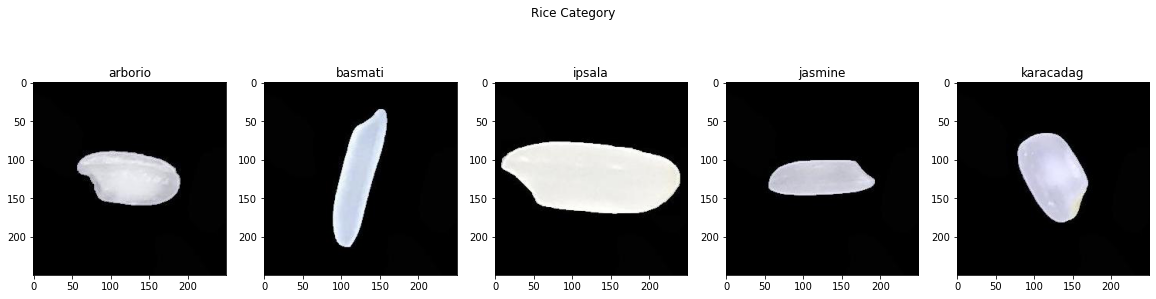

In [6]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_img = img.imread('./dataset/Arborio/Arborio (1).jpg')
basmati_img = img.imread('./dataset//Basmati/Basmati (1).jpg')
ipsala_img = img.imread('./dataset/Ipsala/Ipsala (1).jpg')
jasmine_img = img.imread('./dataset/Jasmine/Jasmine (1).jpg')
karacadag_img = img.imread('./dataset/Karacadag/Karacadag (1).jpg')

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

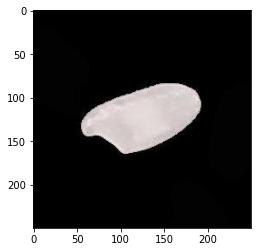

In [7]:
data='./dataset'
import cv2
for category in class_names:
    path=os.path.join(data, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [8]:
training_data=[]
IMG_SIZE=100
def create_training_data():
    for category in class_names:
        path=os.path.join(data, category)
        class_num=class_names.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()   

In [9]:
print(len(training_data))

400


In [10]:
lenofimage = len(training_data)

In [11]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [12]:
X.shape

(400, 30000)

In [13]:
X = X/255.0

In [14]:
X[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
y=np.array(y)
y.shape

(400,)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [18]:
y2 = svc.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.98


In [20]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        20
           3       0.92      1.00      0.96        22
           4       1.00      1.00      1.00        16

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [21]:
import pandas as pd
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result.head(20)

,original,predicted
0,2,2
1,0,0
2,4,4
3,2,2
4,3,3
5,3,3
6,2,2
7,3,3
8,4,4
9,0,0


In [22]:
poly_param_grid = {
    
        "kernel": ["poly"],
        "degree": [2, 3, 4],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "decision_function_shape": ['ovo', 'ovr']
}

In [26]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
poly_grid = GridSearchCV(svm.SVC(), poly_param_grid)
poly_grid.fit(X_train,y_train)
print(poly_grid.best_estimator_)

SVC(C=100, decision_function_shape='ovo', degree=2, kernel='poly')


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
poly_pred = poly_grid.predict(X_test)
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_precision = precision_score(y_test, poly_pred, average='weighted')
poly_recall = recall_score(y_test, poly_pred, average='weighted')
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
print('Precision (Polynomial Kernel): ', "%.2f" % (poly_precision*100))
print('Recall (Polynomial Kernel): ', "%.2f" % (poly_recall*100))


Accuracy (Polynomial Kernel):  97.00
F1 (Polynomial Kernel):  97.00
Precision (Polynomial Kernel):  97.04
Recall (Polynomial Kernel):  97.00


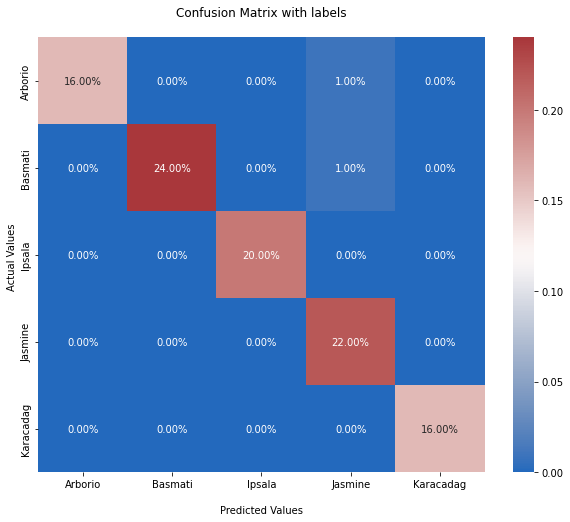

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y2)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='vlag')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()